In [79]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the training data

In [53]:
df = pd.read_csv('scaled_datatrainingcopy.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


# Loading the two test datasets

In [54]:
df_test1 = pd.read_csv('scaled_datatestcopy.csv')
df_test1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.204762,0.376814,1.566862,0.106940,1.207540,1,1
1,2.222275,0.384202,1.539680,0.145214,1.221461,1,1
2,2.233950,0.359575,1.516762,0.176881,1.209162,1,1
3,2.226653,0.316478,1.201302,0.194253,1.174139,1,1
4,2.257300,0.347262,1.180715,0.208776,1.211522,1,1


In [70]:
df_test2 = pd.read_csv('scaled_datatest2copy.csv')
df_test2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,0.742897,0.314074,1.509363,0.930527,0.814063,1,1
1,0.772291,0.280342,1.509363,0.830667,0.790653,1,1
2,0.750246,0.311334,1.493354,0.843289,0.815114,1,1
3,0.750246,0.311334,1.517368,0.862644,0.815114,1,1
4,0.772291,0.314074,1.509363,0.849741,0.831554,1,1


## Dividing the training data

In [71]:
class_name = "Occupancy"

In [72]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# preparing test data for model

In [73]:
class_name = "Occupancy"

attributes = [col for col in df.columns if col != class_name]
X_test1 = df_test1[attributes].values
y_test1 = df_test1[class_name]

In [74]:
class_name = "Occupancy"

attributes = [col for col in df.columns if col != class_name]
X_test2 = df_test2[attributes].values
y_test2 = df_test2[class_name]

# copy the above cells in every sheet

##### Data Partitioning

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score


# k Nearest Neighbor n = 5

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [48]:
y_pred_t1 = clf.predict(X_test1)

In [49]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [50]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [75]:
calro = classification_report(y_test, y_pred, output_dict= True)

In [78]:
calro

{'0': {'precision': 0.9953271028037384,
  'recall': 0.9963617463617463,
  'f1-score': 0.9958441558441559,
  'support': 1924},
 '1': {'precision': 0.9864603481624759,
  'recall': 0.9826589595375722,
  'f1-score': 0.9845559845559845,
  'support': 519},
 'accuracy': 0.9934506753990995,
 'macro avg': {'precision': 0.9908937254831072,
  'recall': 0.9895103529496593,
  'f1-score': 0.9902000702000702,
  'support': 2443},
 'weighted avg': {'precision': 0.9934434164923118,
  'recall': 0.9934506753990995,
  'f1-score': 0.9934460547804795,
  'support': 2443}}

In [77]:
calro.get('accuracy')

0.9934506753990995

# Testset 1 results

In [51]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [52]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# k Nearest Neighbor n = 3

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
y_pred = clf.predict(X_test)

In [64]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [65]:
y_pred_t1 = clf.predict(X_test1)

In [66]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [67]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.99584416 0.98455598]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Roc curve for trainingset

In [90]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [89]:
import scikitplot as skplt
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'scikitplot'

# k Nearest Neighbor n = 5

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [48]:
y_pred_t1 = clf.predict(X_test1)

In [49]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [50]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [51]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [52]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# k Nearest Neighbor n = 5

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [48]:
y_pred_t1 = clf.predict(X_test1)

In [49]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [93]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
y_score = clf.predict_proba(X_test)

Accuracy 0.9934506753990995
F1-score [0.99584416 0.98455598]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [51]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [52]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# Scikit-plot


In [92]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

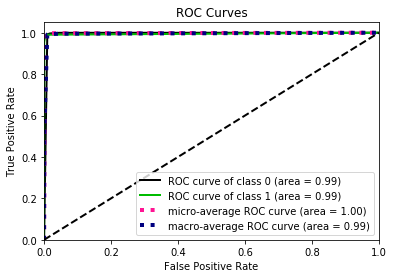

In [94]:
plot_roc(y_test, y_score)
plt.show()

# Testset 1 results

In [68]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.9467166979362102
F1-score [0.95867288 0.9250264 ]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1693
           1       0.95      0.90      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.94      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [69]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9837981952420016
F1-score [0.98972157 0.96176186]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.97      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.98      0.98      0.98      9752



# Trying scaled data to see the results

In [111]:
df = pd.read_csv("procced_datatrainingcopy.csv")
class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [110]:
class_name = "Occupancy"

In [102]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# k Nearest Neighbor

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [115]:
y_pred = clf.predict(X_test)

In [116]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

# Testset results

In [117]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9918133442488744
F1-score [0.99479979 0.98076923]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Trainingset 1 results

In [118]:
df = pd.read_csv("scaled_datatestcopy.csv")

class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X_test01 = df[attributes].values
y_test02 = df[class_name]



KeyError: 'Occupancy'

In [16]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373695 0.9772296 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [17]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform') #test con k=1 e weight uniform
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99376623 0.97683398]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1924
           1       0.98      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [18]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance') #k = 3 and weight distance
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897666803110929
F1-score [0.99350143 0.9759384 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1924
           1       0.97      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [19]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.9506 (+/- 0.065)
F1-score: 0.9272 (+/- 0.093)


In [20]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [21]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
clf = search.best_estimator_

### An example from sklearn

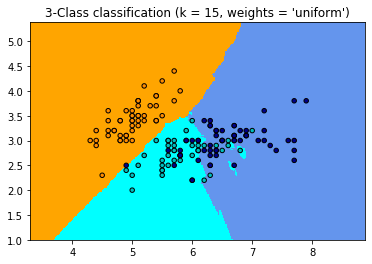

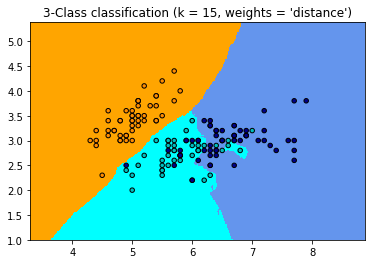

In [23]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [25]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373041 0.97731569]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [28]:
df[numeric_columns].head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Week_day
0,23.18,27.2720,426.0,721.25,0.004793,1,1
1,23.15,27.2675,429.5,714.00,0.004783,1,1
2,23.15,27.2450,426.0,713.50,0.004779,1,1
3,23.15,27.2000,426.0,708.25,0.004772,1,1
4,23.10,27.2000,426.0,704.50,0.004757,1,1


In [29]:
X_train_num, X_test_num, y_train, y_test = train_test_split(
    df[[c for c in numeric_columns if c != class_name]], df[class_name], 
       test_size=0.3, random_state=100, stratify=df[class_name])

In [30]:
clf = GaussianNB()
clf.fit(X_train_num, y_train)
y_pred = clf.predict(X_test_num)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373041 0.97731569]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [31]:
rdf[[c for c in rdf.columns if c not in numeric_columns]].head()

,date
0,2/4/15 17:51
1,2/4/15 17:51
2,2/4/15 17:53
3,2/4/15 17:54
4,2/4/15 17:55


In [32]:
from sklearn.preprocessing import LabelEncoder

rdf_en = rdf[[c for c in rdf.columns if c not in numeric_columns]].apply(LabelEncoder().fit_transform)
rdf_en.head()

,date
0,460
1,460
2,461
3,462
4,463


In [ ]:
X = 

In [47]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    rdf_en[[c for c in rdf_en.columns if c not in numeric_columns]], df[class_name], 
       test_size=0.01, random_state=100, stratify=df[class_name])

In [34]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
y_pred = clf.predict(X_test_cat)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.787556283258289
F1-score [0.88115411 0.        ]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1924
           1       0.00      0.00      0.00       519

    accuracy                           0.79      2443
   macro avg       0.39      0.50      0.44      2443
weighted avg       0.62      0.79      0.69      2443



/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
result = classification_report(y_test, y_pred)

In [45]:
result

'              precision    recall  f1-score   support\n\n           0       0.79      1.00      0.88      1924\n           1       0.00      0.00      0.00       519\n\n    accuracy                           0.79      2443\n   macro avg       0.39      0.50      0.44      2443\nweighted avg       0.62      0.79      0.69      2443\n'